# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt 


## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

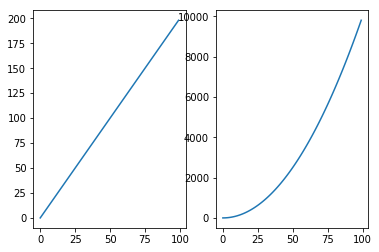

In [3]:
plt.figure()
plt.subplot(121)
plt.plot(x, y)

plt.subplot(122)
plt.plot(x, z)

plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

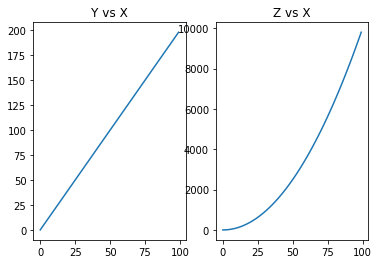

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2)#, sharey=True)


ax1.plot(x, y)

ax2.plot(x, z)

ax1.set_title('Y vs X')
ax2.set_title('Z vs X')


plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [5]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

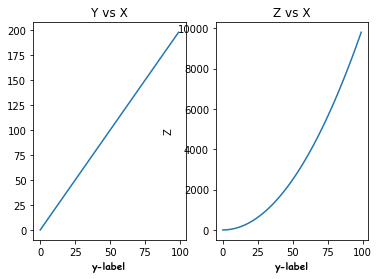

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.plot(x, y)
ax1.set_title('Y vs X')
ax1.set_xlabel('x-label', fontname='Arial',fontsize=20, fontweight='bold')
ax1.set_xlabel('y-label', fontname='Comic Sans MS',fontsize=10, fontweight='bold')


ax2.plot(x, z)
plt.xlabel('X')
plt.ylabel('Z')
ax2.set_title('Z vs X')
ax2.set_xlabel('x-label', fontname='Arial',fontsize=20, fontweight='bold')
ax2.set_xlabel('y-label', fontname='Comic Sans MS',fontsize=10, fontweight='bold')

plt.show()


#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

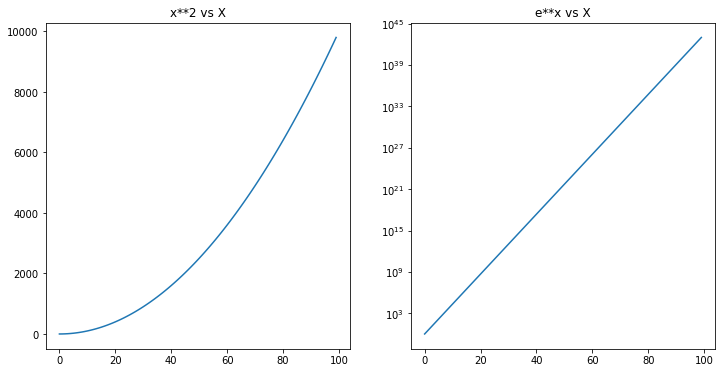

In [7]:
import math 

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6),)


ax1.plot(x, x**2)
ax1.set_yscale('linear')
ax1.set_title('x**2 vs X')


ax2.plot(x, np.exp(x))
ax2.set_yscale('log')
ax2.set_title('e**x vs X')


plt.show()

#### As a bonus challenge, try to add a legend to the plot.

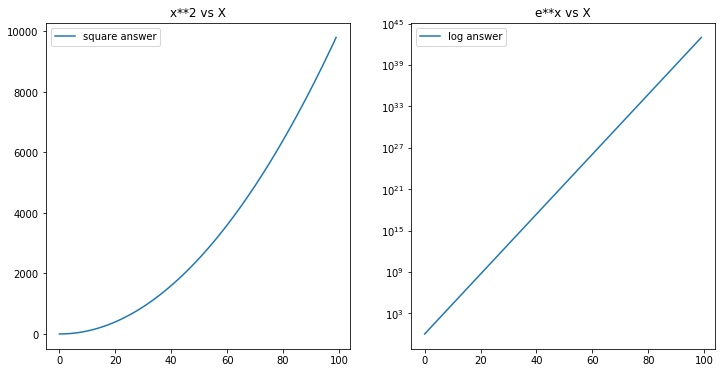

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))


a = ax1.plot(x, x**2, label='square answer')
ax1.set_yscale('linear')
ax1.set_title('x**2 vs X')
ax1.legend();


b = ax2.plot(x, np.exp(x), label = 'log answer')
ax2.set_yscale('log')
ax2.set_title('e**x vs X')
ax2.legend();

plt.show()


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
import pymysql
from sqlalchemy import create_engine* table: `fitbit2`

In [9]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'fitbit'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'
engine = create_engine(connection_string)

query = 'SELECT * from fitbit2'
fit = pd.read_sql(query,engine)
fit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.40389115,Friday,4,1,6.4,92.0863309353,0,0,May,5
1,2015-05-09,3631,18925,14.11,4,611,316,61,60,2248,...,8.76754481,Saturday,5,0,7.56666666667,92.4643584521,6.4,92.0863309353,May,5
2,2015-05-10,3204,14228,10.57,1,602,226,14,77,1719,...,6.56789147,Sunday,6,0,6.45,88.7614678899,7.56666666667,92.4643584521,May,5
3,2015-05-11,2673,6756,5.02,8,749,190,23,4,9620,...,3.11928242,Monday,0,1,5.18333333333,88.8571428571,6.45,88.7614678899,May,5
4,2015-05-12,2495,502,3.73,1,876,171,0,0,7360,...,2.31771383,Tuesday,1,1,6.78333333333,82.8920570265,5.18333333333,88.8571428571,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

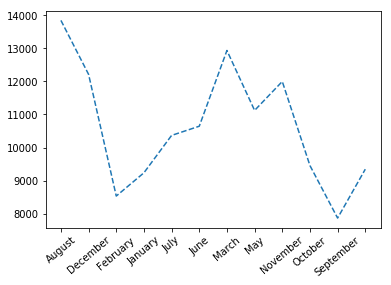

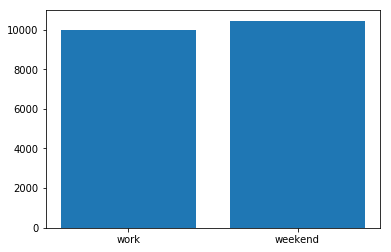

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED

months = fit.groupby(['Months'],as_index= False)[['Steps']].median()
months.head()

plt.plot(months.Months, months.Steps,'--')
plt.sca
plt.xticks(np.arange(12), months.Months[1:13], rotation=40)
plt.savefig('figures/stepsbymonth.png')
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
weeks = fit.groupby(['Work_or_Weekend'],as_index = False).median()
weeks.head()
plt.bar(weeks.Work_or_Weekend,weeks.Steps)
plt.xticks(np.arange(2),('work', 'weekend'))
plt.savefig('figures/stepsbywork.png')




plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [11]:
ycolumn = [fit['Minutes Lightly Active'],fit['Minutes Very Active'], fit['Minutes Sedentary']]   

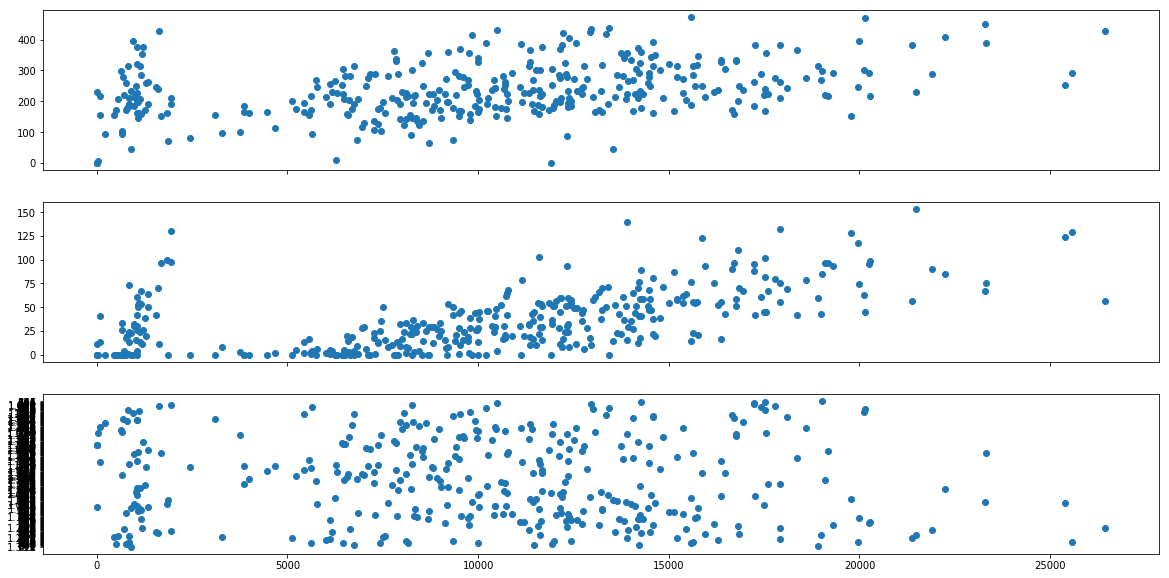

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(20,10), sharex=True)

for item in range(3):
    ax[item].scatter(fit.Steps, ycolumn[item])

plt.savefig('figures/loop.png')
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [24]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'titanic'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'
engine = create_engine(connection_string)

query = 'SELECT * from titanic'
tit = pd.read_sql(query,engine)
tit.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [25]:
tit.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [26]:
# NUMERICAL VARIABLES
ints = tit.select_dtypes(exclude = ['object'])
ints.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [27]:
# CATEGORICAL VARIABLES
strings = tit.select_dtypes(include = ['object'])
strings.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

#### Use the right visulalization to show the distribution of column `Age`.

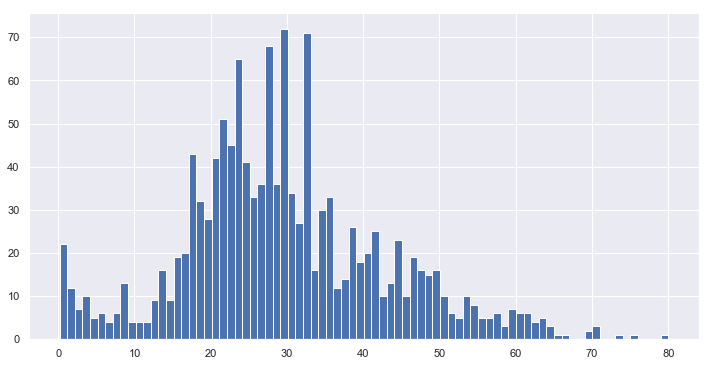

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12,6), sharex=True)
plt.hist(tit.Age, bins=80)
plt.xticks(np.arange(0, 90, step=10))
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

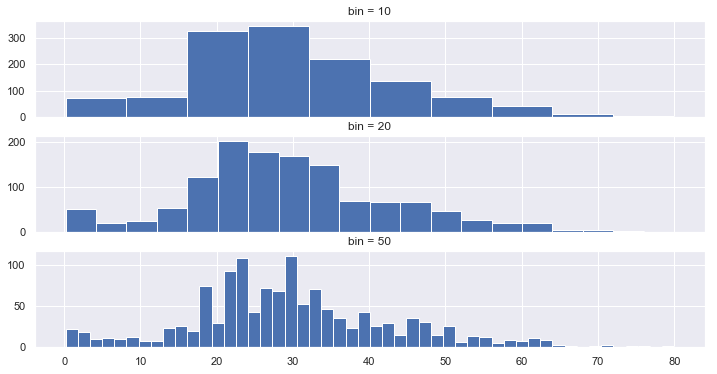

In [29]:
b=[10,20,50]
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True)
for item in range(3):
    ax[item].hist(tit.Age, bins= b[item])
    ax[item].set_title(f'bin = {b[item]}')
plt.show()

#### How does the bin size affect your plot?

Increase the precission.

#### Use seaborn to show the distribution of column `Age`.

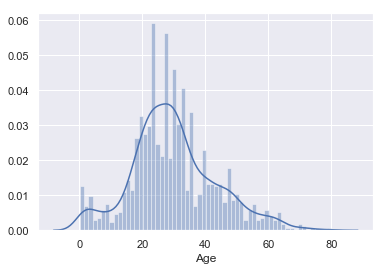

In [34]:
import seaborn as sns
sns.set()
sns.distplot(tit.Age, bins = 60)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [45]:
# Method 1 - matplotlib
gender = tit.groupby(['Gender'], as_index = False).count()[['Gender','PassengerId']]
gender

,Gender,PassengerId
0,female,466
1,male,843


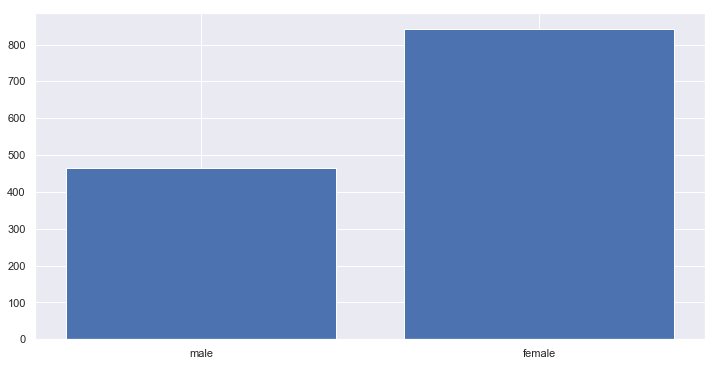

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.bar(gender.Gender,gender.PassengerId)
plt.xticks(np.arange(2),('male', 'female'))

plt.show()

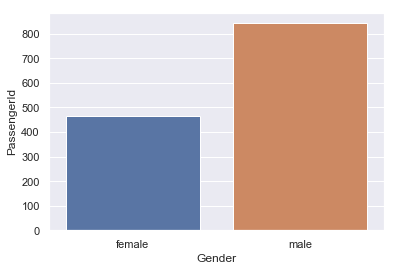

In [53]:
# Method 2 - seaborn
sns.barplot(gender.Gender, gender.PassengerId)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

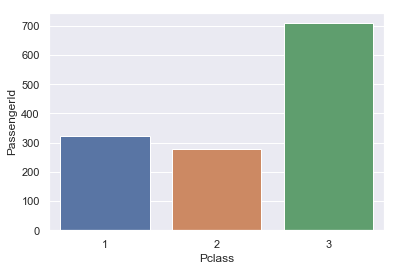

In [58]:
pclass = tit.groupby(['Pclass'], as_index = False).count()[['Pclass','PassengerId']]
pclass

sns.barplot(pclass.Pclass, pclass.PassengerId)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

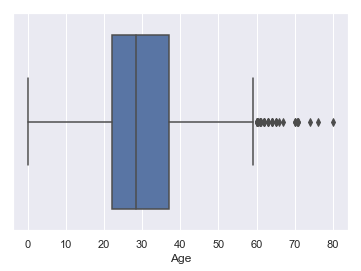

In [124]:

ax = sns.boxplot(tit["Age"])


#### What does the last plot tell you about the feature `Age`?

Data obtained from the plot:

Median (p0.5)  = 28 years old

p0.25 = 21 years old

p0.75 =  37 years old

min age =  0 years old (newborn)

max age = 59 years old

outlayer until 80years old( independent people very old that there are not very much)

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

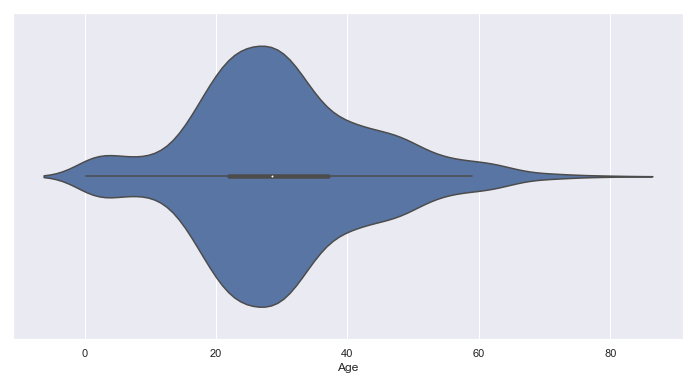

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax = sns.violinplot(tit["Age"])


#### What additional information does the last plot provide about feature `Age`?

same as box plot, but here we can see the outlayer easily.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

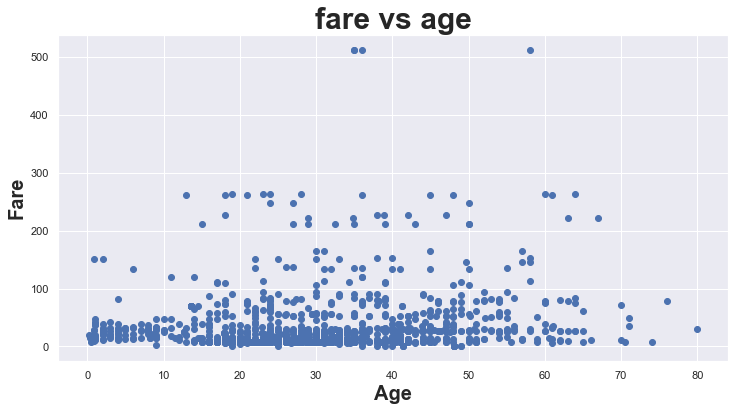

In [101]:
# Method 1 - matplotlib

fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.scatter(tit.Age,tit.Fare)
plt.title('fare vs age',fontsize=30, fontweight='bold')
plt.xlabel('Age',fontsize=20, fontweight='bold')
plt.ylabel('Fare',fontsize=20, fontweight='bold')
plt.show()

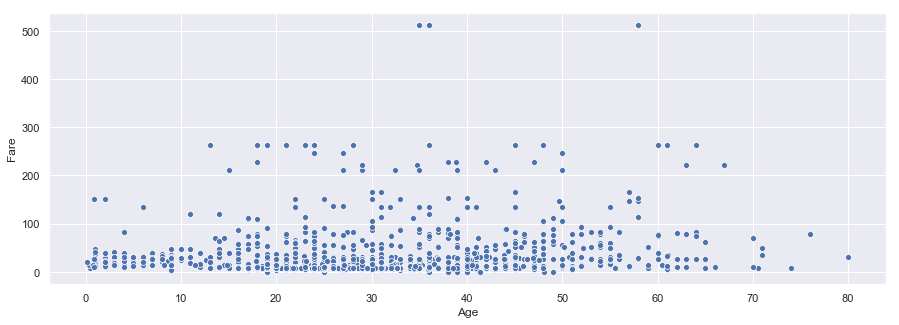

In [105]:
# Method 2 - seaborn
plt.figure(figsize=(15,5))
sns.scatterplot(tit.Age,tit.Fare)

plt.show()

#### Plot the correlation matrix using seaborn.

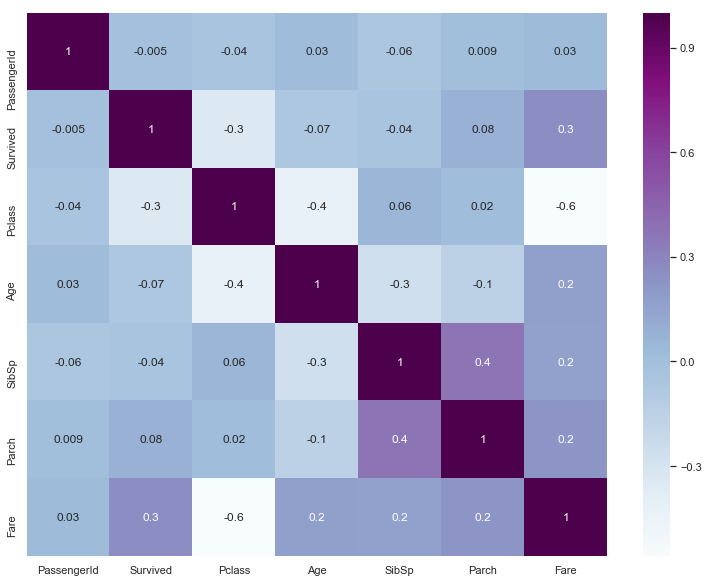

In [123]:
plt.figure(figsize=(13,10))

sns.heatmap(tit.corr(),annot = True, fmt='.1g',cmap = 'BuPu')
plt.show()


#### What are the most correlated features?

**Maximum correlation**

Sibsp-Parch with a 0.4 corr value

**Second maximum correlation**

People Survived - Fare ticket with a 0.3 corr value

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

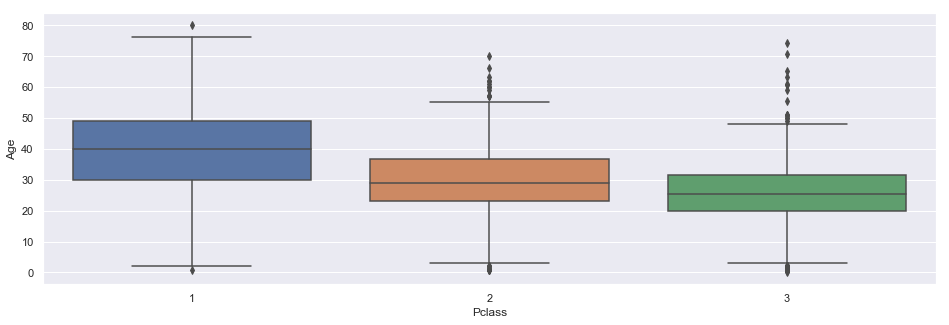

In [131]:
plt.figure(figsize=(16,5))

ax = sns.boxplot(x=tit["Pclass"],y=tit['Age'])


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

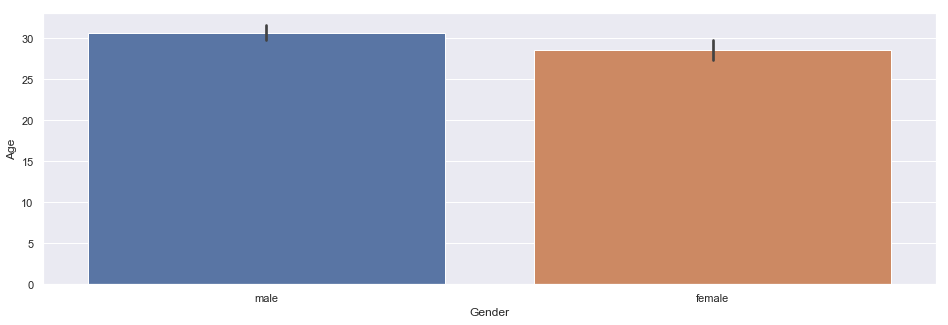

In [136]:
plt.figure(figsize=(16,5))

sns.barplot(x=tit["Gender"],y=tit['Age'])
plt.show()